In [45]:
import tensorflow
from tensorflow import keras 
from keras  import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16

In [46]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
conv_base.trainable = True  # Allow fine-tuning

for layer in conv_base.layers[:-4]:  # Freeze all layers except the last 4
    layer.trainable = False


In [47]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [48]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,878,145 (64.39 MB)

 Trainable params: 9,242,881 (35.26 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [51]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [52]:
# 5️⃣ Data Augmentation (Optimized)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# 6️⃣ Load Data
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    directory='archive/Train',
    target_size=(150,150),
    class_mode='binary',
    batch_size=batch_size,
    shuffle=True  # ✅ Important for training
)

test_generator = test_datagen.flow_from_directory(
    directory='archive/Test',
    target_size=(150,150),
    class_mode='binary',
    batch_size=batch_size,
    shuffle=False  # 🚨 Test set should NOT be shuffled
)

# 7️⃣ Compute Class Weights

Found 177 images belonging to 2 classes.
Found 76 images belonging to 2 classes.


In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# 9️⃣ Use Early Stopping to Prevent Overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 🔟 Train Model with Class Weights & Early Stopping
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=20,  # Increased max epochs (early stopping will stop earlier if needed)
                    class_weight=class_weights,
                    callbacks=[early_stopping])


c:\Users\12345\Desktop\New folder\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5323 - loss: 0.7015 - val_accuracy: 0.7105 - val_loss: 0.6446
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6110 - loss: 0.6768 - val_accuracy: 0.7500 - val_loss: 0.6319
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5992 - loss: 0.6507 - val_accuracy: 0.7368 - val_loss: 0.6219
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7115 - loss: 0.5931 - val_accuracy: 0.7500 - val_loss: 0.6088
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7203 - loss: 0.5842 - val_accuracy: 0.7105 - val_loss: 0.5927
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7133 - loss: 0.5581 - val_accuracy: 0.7105 - val_loss: 0.5825
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7156 - loss: 0.5771 - val_accuracy: 0.7368 - val_loss: 0.5768
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7560 - loss: 0.5374 - val_accuracy: 0.7500 - val_loss: 0.5708
Epoch 9/

In [55]:
import matplotlib.pyplot as plt

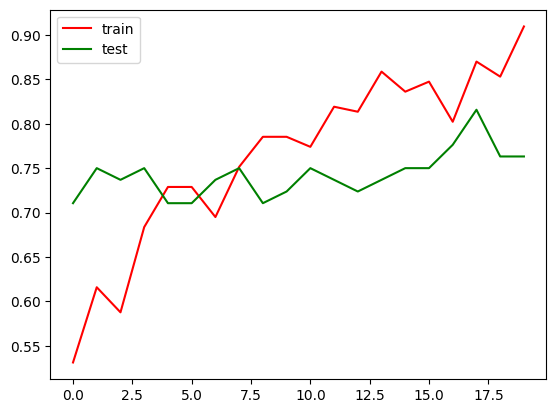

In [56]:
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    plt.plot(history.history['accuracy'], color='red', label='train')
    plt.plot(history.history['val_accuracy'], color='green', label='test')
    plt.legend()
    plt.show()
else:
    print("Error: Training history not available.")

In [57]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob.flatten() > 0.5).astype(int)  # ✅ Fix: Flatten output

y_true = test_generator.classes  # Get true labels
print(classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1']))

2/3 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:5 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000016F10287880> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
              precision    recall  f1-score   support

     Class 0       0.72      0.62      0.67        29
     Class 1       0.78      0.85      0.82        47

    accuracy                           0.76        76
   macro avg       0.75      0.74      0.74        76
weighted avg       0.76      0.76      0.76        76



In [59]:

import numpy as np

train_counts = np.bincount(train_generator.classes)
test_counts = np.bincount(test_generator.classes)

print("Training class distribution:", train_counts)
print("Testing class distribution:", test_counts)


Training class distribution: [ 69 108]
Testing class distribution: [29 47]


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


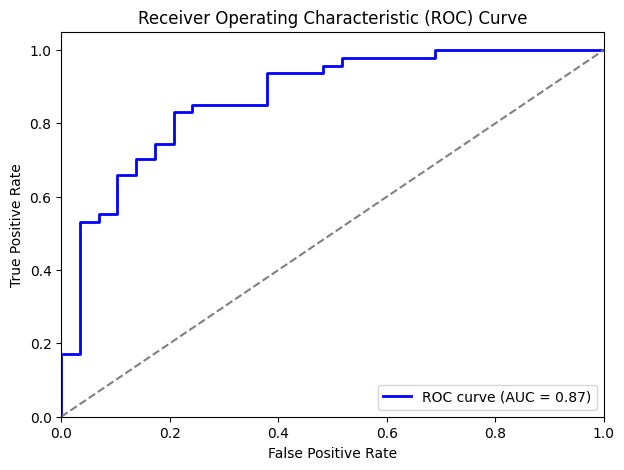

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions
y_pred_prob = model.predict(test_generator).flatten()  # Get probability scores
y_true = test_generator.classes  # True labels

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [61]:
model.save('model.h5')

In [62]:
from keras.models import load_model
model = load_model('model.h5')

In [63]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Class labels for binary classification
class_labels = ['No Tumor', 'Tumor']  # Adjusted for binary classification

def detect_and_display(img_path, model, image_size=150):
    """
    Function to detect the presence of a tumor and display results.
    If no tumor is detected, it displays "No Tumor".
    Otherwise, it shows "Tumor Detected" with confidence.
    """
    try:
        # Load and preprocess the image
        img = load_img(img_path, target_size=(image_size, image_size))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make a prediction
        prediction = model.predict(img_array)[0][0]  # Extract single value

        # Decision threshold (since it's sigmoid)
        confidence_score = prediction
        if prediction < 0.5:
            result = "No Tumor"
            confidence_score = 1 - prediction  # Adjust confidence for "No Tumor"
        else:
            result = "Tumor Detected"

        # Display the image with prediction
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


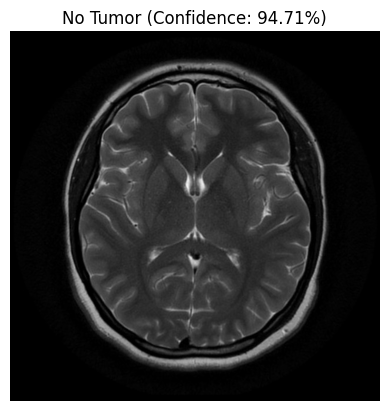

In [64]:
img_path='../archive/Test/no/1 no.jpeg'
detect_and_display(img_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


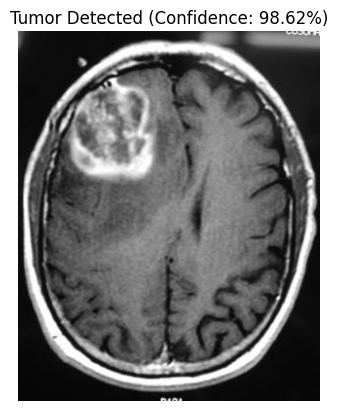

In [65]:
img_path='../archive/Test/yes/Y34.jpg'
detect_and_display(img_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


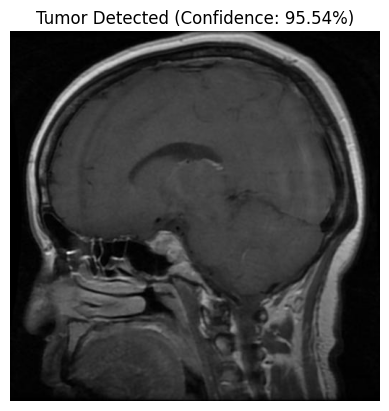

In [66]:
img_path='../archive/val/yes4.jpg'
detect_and_display(img_path, model)
